## 1. Import necessary packages

In [1]:
import cv2
import torch

from matplotlib import pyplot as plt
from util.utils import load_state_dict
from util.visualize import plot_bounding_boxes_on_image_cv2

/home/houxiuquan/miniconda3/envs/cp311pt211/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Load a model and class information

We encode class information into the checkpoint, use our defined `load_state_dict` to handle it.

In [2]:
from configs.salience_detr.salience_detr_resnet50_800_1333 import model
weight = torch.load("checkpoint.pth")
load_state_dict(model, weight)
model = model.eval()

Using /home/houxiuquan/.cache/torch_extensions/py311_cu118 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /home/houxiuquan/.cache/torch_extensions/py311_cu118/MultiScaleDeformableAttention/build.ninja...
Building extension module MultiScaleDeformableAttention...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
Loading extension module MultiScaleDeformableAttention...


ninja: no work to do.


/home/houxiuquan/miniconda3/envs/cp311pt211/lib/python3.11/site-packages/torch/overrides.py:110: UserWarning: 'has_cuda' is deprecated, please use 'torch.backends.cuda.is_built()'
  torch.has_cuda,
/home/houxiuquan/miniconda3/envs/cp311pt211/lib/python3.11/site-packages/torch/overrides.py:111: UserWarning: 'has_cudnn' is deprecated, please use 'torch.backends.cudnn.is_available()'
  torch.has_cudnn,
/home/houxiuquan/miniconda3/envs/cp311pt211/lib/python3.11/site-packages/torch/overrides.py:117: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  torch.has_mps,
/home/houxiuquan/miniconda3/envs/cp311pt211/lib/python3.11/site-packages/torch/overrides.py:118: UserWarning: 'has_mkldnn' is deprecated, please use 'torch.backends.mkldnn.is_available()'
  torch.has_mkldnn,


In [3]:
image = cv2.imread("data/coco/val2017/000000000724.jpg")
torch_image = torch.tensor(image.transpose(2, 0, 1))

## 3. Inference on the image

In [4]:
predictions = model([torch_image])[0]
# The following code also works:
# predictions = model(torch_image.unsqueeze(0))[0]

## 4. Visualize results

In [5]:
image_for_show = plot_bounding_boxes_on_image_cv2(
    image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
    boxes=predictions["boxes"],
    labels=predictions["labels"],
    scores=predictions["scores"],
    classes=model.CLASSES,  # class information
    show_conf=0.5,
    font_scale=0.5,
    box_thick=2,
    text_alpha=0.75,
)

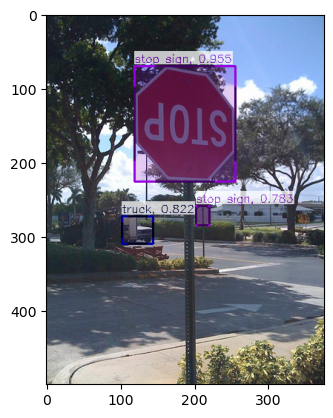

In [6]:
plt.imshow(image_for_show)